In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy


In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6d4c0d3cc516ab9e51f836ce460b1e14


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

76.40092009895474 147.22214030849852
80.75718829144094 161.97742013555876
89.69819691954288 76.6602349895702
-7.669530787804689 17.691752068098538
-31.970407662951587 -60.12337722921794
59.18849620922319 148.79798986141435
-51.302213628382425 174.99965867272715
11.096044411434107 -47.64039961140864
-3.5839538986512025 46.45216315350754
-9.696648927099574 -33.79504170699144
-84.61680400736577 20.47019271630154
64.36375246414843 86.96428817731913
55.93953894196275 3.891540025997955
74.04748586182575 170.49622672741867
-8.899567740708477 12.564348439542982
-15.133593297577107 -37.45744574282952
18.437408993306377 138.2970222080366
18.75522310266699 162.6450131114335
-21.784311676216603 -31.178787923977467
10.970274157708545 136.7397888212369
-49.539655488619026 -86.29009024059016
-60.36359342123895 -172.5803428191693
-41.31077914833046 117.43821011008379
-40.27378873031397 110.7557121422297
-14.220245783665149 109.74172634659351
-19.224704646249492 -162.83996158578458
51.38186951936174 -2

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | chokurdakh
Processing Record 2 of Set 1 | cherskiy
Processing Record 3 of Set 1 | dikson
Processing Record 4 of Set 1 | kasongo-lunda
Processing Record 5 of Set 1 | parana
Processing Record 6 of Set 1 | arman
Processing Record 7 of Set 1 | dunedin
Processing Record 8 of Set 1 | cayenne
Processing Record 9 of Set 1 | kismayo
Processing Record 10 of Set 1 | sao jose da coroa grande
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | turukhansk
Processing Record 13 of Set 1 | den helder
Processing Record 14 of Set 1 | pevek
Processing Record 15 of Set 1 | luanda
Processing Record 16 of Set 1 | canavieiras
Processing Record 17 of Set 1 | airai
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | caravelas
Processing Record 20 of Set 1 | castro
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | albany
Processing Record 23 of Set 1 | busselton
Processing Record 24 of Set 1 | bambanglipuro
Processin

Processing Record 36 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 37 of Set 4 | vangaindrano
Processing Record 38 of Set 4 | buarcos
Processing Record 39 of Set 4 | tual
Processing Record 40 of Set 4 | mar del plata
Processing Record 41 of Set 4 | limon
Processing Record 42 of Set 4 | buraydah
Processing Record 43 of Set 4 | pisco
Processing Record 44 of Set 4 | ancud
Processing Record 45 of Set 4 | mabaruma
Processing Record 46 of Set 4 | yellowknife
Processing Record 47 of Set 4 | port alfred
Processing Record 48 of Set 4 | knysna
Processing Record 49 of Set 4 | arraial do cabo
Processing Record 50 of Set 4 | la asuncion
Processing Record 1 of Set 5 | balkanabat
Processing Record 2 of Set 5 | faanui
Processing Record 3 of Set 5 | naryan-mar
Processing Record 4 of Set 5 | thompson
Processing Record 5 of Set 5 | llanes
Processing Record 6 of Set 5 | ekibastuz
Processing Record 7 of Set 5 | marcona
City not found. Skipping...
Processing Record 8 of Set 5 | tilichiki

Processing Record 26 of Set 8 | fukue
Processing Record 27 of Set 8 | quang ngai
Processing Record 28 of Set 8 | hudson bay
Processing Record 29 of Set 8 | ipanema
Processing Record 30 of Set 8 | sembakung
Processing Record 31 of Set 8 | yambio
Processing Record 32 of Set 8 | mahajanga
Processing Record 33 of Set 8 | newala
Processing Record 34 of Set 8 | tarauaca
Processing Record 35 of Set 8 | kralendijk
Processing Record 36 of Set 8 | zile
Processing Record 37 of Set 8 | burica
City not found. Skipping...
Processing Record 38 of Set 8 | tiksi
Processing Record 39 of Set 8 | nabire
Processing Record 40 of Set 8 | sorvag
City not found. Skipping...
Processing Record 41 of Set 8 | grindavik
Processing Record 42 of Set 8 | whittlesea
Processing Record 43 of Set 8 | isangel
Processing Record 44 of Set 8 | fountain
Processing Record 45 of Set 8 | homer
Processing Record 46 of Set 8 | boshnyakovo
Processing Record 47 of Set 8 | ovruch
Processing Record 48 of Set 8 | blythe
Processing Recor

Processing Record 13 of Set 12 | somerset east
Processing Record 14 of Set 12 | charagua
Processing Record 15 of Set 12 | westport
Processing Record 16 of Set 12 | yueyang
Processing Record 17 of Set 12 | sao filipe
Processing Record 18 of Set 12 | kidal
Processing Record 19 of Set 12 | calahorra
Processing Record 20 of Set 12 | verkhniy fiagdon
Processing Record 21 of Set 12 | ponta delgada
Processing Record 22 of Set 12 | sackville
Processing Record 23 of Set 12 | melbu
Processing Record 24 of Set 12 | baturaja
Processing Record 25 of Set 12 | igarka
Processing Record 26 of Set 12 | matagami
Processing Record 27 of Set 12 | san pedro de uraba
Processing Record 28 of Set 12 | mogadishu
Processing Record 29 of Set 12 | beidao
Processing Record 30 of Set 12 | dzhebariki-khaya
Processing Record 31 of Set 12 | mehamn
Processing Record 32 of Set 12 | barawe
City not found. Skipping...
Processing Record 33 of Set 12 | jining
Processing Record 34 of Set 12 | amga
Processing Record 35 of Set 

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chokurdakh,70.6333,147.9167,40.93,77,100,12.17,RU,2022-08-24 22:14:52
1,Cherskiy,68.7500,161.3000,60.93,59,79,6.20,RU,2022-08-24 22:14:52
2,Dikson,73.5069,80.5464,39.99,87,100,22.70,RU,2022-08-24 22:14:53
3,Kasongo-Lunda,-6.4667,16.8167,79.81,46,75,2.66,CD,2022-08-24 22:14:53
4,Parana,-31.7320,-60.5238,75.54,66,7,7.02,AR,2022-08-24 22:11:56
5,Arman,59.7000,150.1667,53.40,83,100,8.99,RU,2022-08-24 22:14:54
6,Dunedin,-45.8742,170.5036,50.81,54,100,8.99,NZ,2022-08-24 22:14:28
7,Cayenne,4.9333,-52.3333,78.84,83,0,3.44,GF,2022-08-24 22:14:54
8,Kismayo,-0.3582,42.5454,75.13,82,100,16.33,SO,2022-08-24 22:14:55
9,Sao Jose Da Coroa Grande,-8.8978,-35.1478,72.72,78,57,11.77,BR,2022-08-24 22:14:55


In [18]:
new_column_order= ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chokurdakh,RU,2022-08-24 22:14:52,70.6333,147.9167,40.93,77,100,12.17
1,Cherskiy,RU,2022-08-24 22:14:52,68.7500,161.3000,60.93,59,79,6.20
2,Dikson,RU,2022-08-24 22:14:53,73.5069,80.5464,39.99,87,100,22.70
3,Kasongo-Lunda,CD,2022-08-24 22:14:53,-6.4667,16.8167,79.81,46,75,2.66
4,Parana,AR,2022-08-24 22:11:56,-31.7320,-60.5238,75.54,66,7,7.02
5,Arman,RU,2022-08-24 22:14:54,59.7000,150.1667,53.40,83,100,8.99
6,Dunedin,NZ,2022-08-24 22:14:28,-45.8742,170.5036,50.81,54,100,8.99
7,Cayenne,GF,2022-08-24 22:14:54,4.9333,-52.3333,78.84,83,0,3.44
8,Kismayo,SO,2022-08-24 22:14:55,-0.3582,42.5454,75.13,82,100,16.33
9,Sao Jose Da Coroa Grande,BR,2022-08-24 22:14:55,-8.8978,-35.1478,72.72,78,57,11.77


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

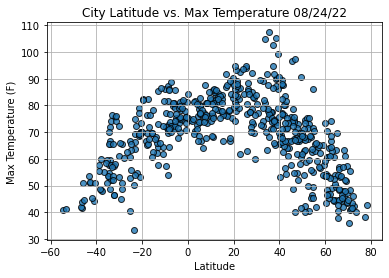

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

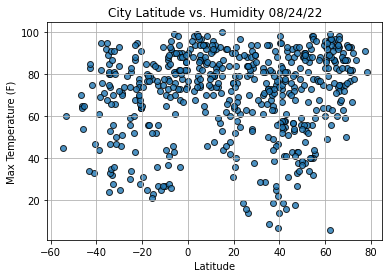

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

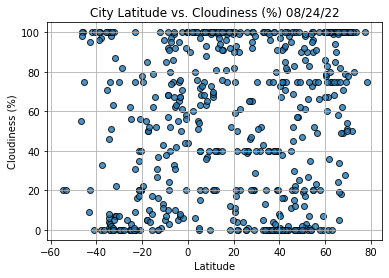

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()